In [1]:
from tensorflow import keras
model = keras.models.load_model('./SavedModel/RNN_V2_RNN_V2_14/')

In [2]:
import pickle
pickle_in = open("./data/top11_X_seq.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("./data/top11_y_seq.pickle","rb")
y = pickle.load(pickle_in)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
import numpy as np
y_predict = model.predict(X_test)


In [5]:
y_predict

array([[0.50160116, 0.04523362, 0.0265328 , ..., 0.02360279, 0.00452808,
        0.02240554],
       [0.10306573, 0.24288872, 0.01265746, ..., 0.00849207, 0.08007599,
        0.03257773],
       [0.00874289, 0.02098964, 0.00135328, ..., 0.03234525, 0.02181898,
        0.01449805],
       ...,
       [0.01351722, 0.08484412, 0.00760453, ..., 0.01077135, 0.03770273,
        0.8511029 ],
       [0.01091659, 0.0326408 , 0.00486266, ..., 0.03158519, 0.05359608,
        0.01755047],
       [0.0101714 , 0.00773121, 0.00615104, ..., 0.08850229, 0.0353671 ,
        0.00311306]], dtype=float32)

In [12]:
y_test[:6]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [16]:
predictions = np.round(y_predict)

for i in range(predictions.shape[0]):
    arr = predictions[i]
    if sum(arr) == 0:
        predictions[i,np.argmax(y_predict[i])] =1
predictions[:6]

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [60]:
prediction_score = np.count_nonzero(predictions, axis=0)
base_truth = np.count_nonzero(y_test, axis=0)
print(base_truth)
print(prediction_score)


[19 29 35 25 34 34 43 16 14 23]
[13 34 42 19 14 24 38 17 23 23]


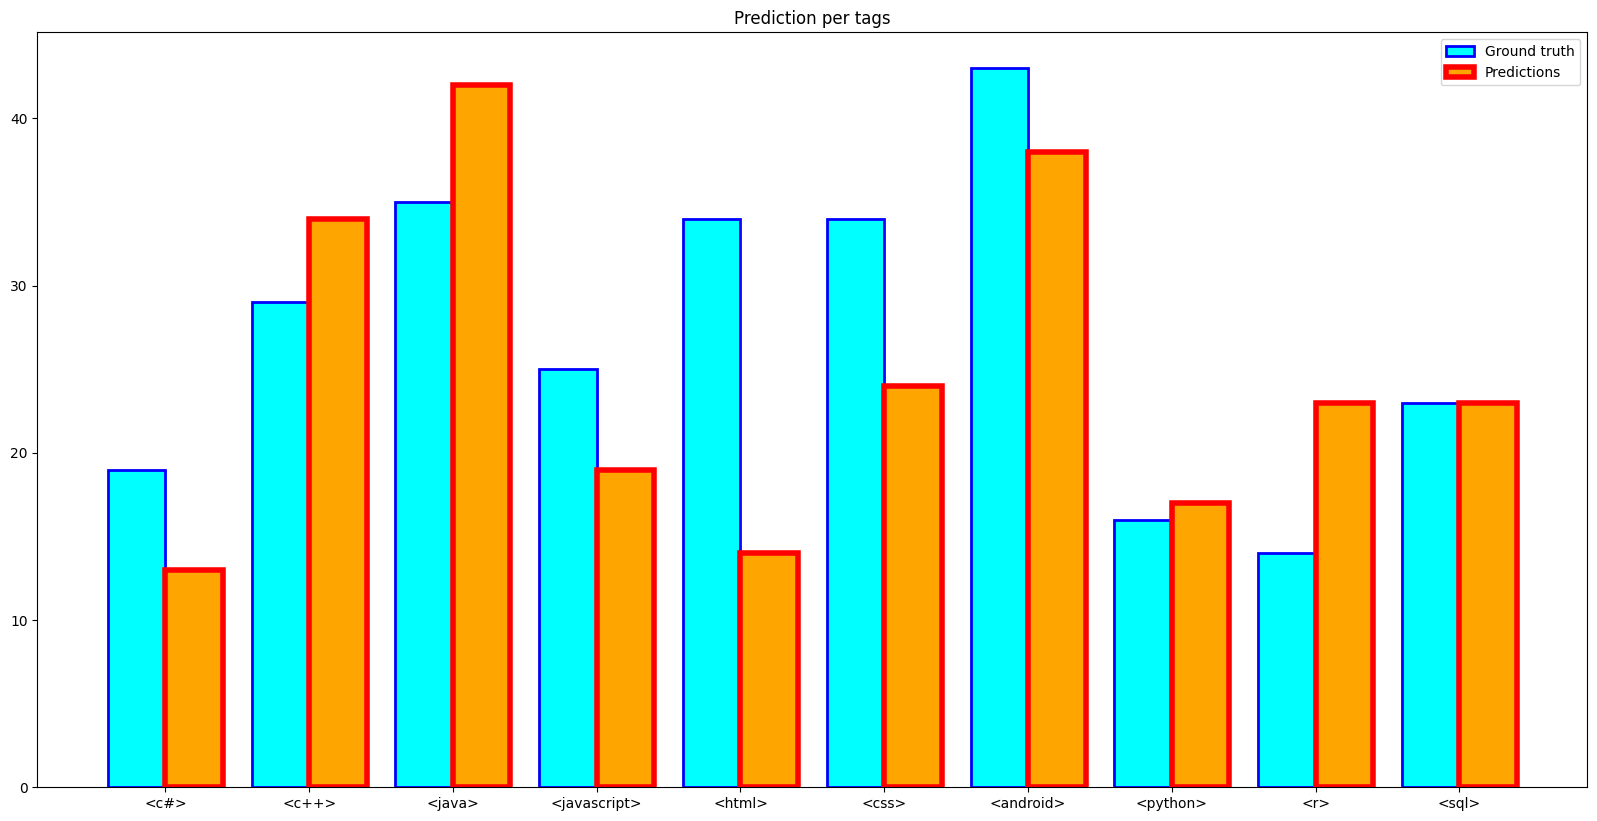

In [58]:
from matplotlib import pyplot
barWidth = 0.3
target_interest  = ["<c#>", "<c++>", "<java>", "<javascript>", "<html>","<css>","<android>",
                    "<python>", "<r>", "<sql>"]
y2 = prediction_score
y1 = base_truth
r = range(len(y1))
barWidth = 0.4

r1 = range(len(y1))
r2 = [x + barWidth for x in r1]

pyplot.figure(figsize=(20,10),dpi=100,facecolor="white")
pyplot.title("Prediction per tags")
pyplot.bar(r1, y1, width = barWidth, color = ['cyan' for i in y1],label="Ground truth",
           edgecolor = ['blue' for i in y1], linewidth = 2)
pyplot.bar(r2, y2, width = barWidth, color = ['orange' for i in y1],label="Predictions",
           edgecolor = ['red' for i in y1], linewidth = 4)
pyplot.xticks([r + barWidth / 2 for r in range(len(y1))], target_interest)
pyplot.legend(loc="upper right")
pyplot.savefig("Prediction per tags")

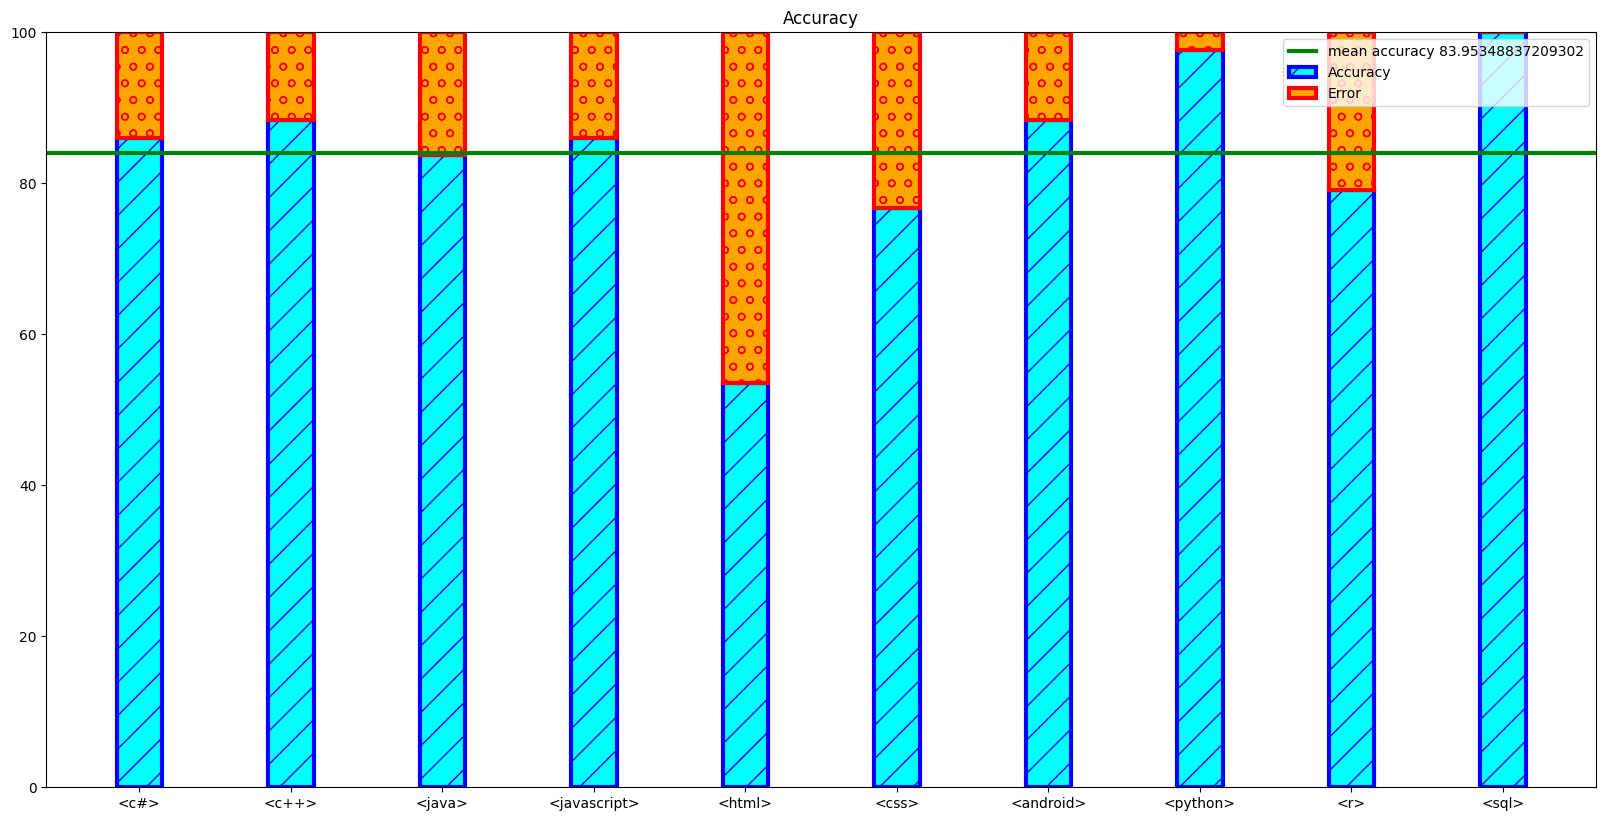

In [57]:
barWidth = 0.3

error = np.abs(base_truth-prediction_score)*100/np.max(base_truth)
y1 = 100 - error
y2 = error
r = range(y1.shape[0])
pyplot.figure(figsize=(20,10),dpi=100,facecolor="white")
accuracy = np.mean(100-error)
pyplot.title("Accuracy")
pyplot.axhline(y=accuracy,label="mean accuracy {}".format(accuracy), color ="green", linewidth = 3)
pyplot.bar(r, y1, width = barWidth, color = ['cyan' for i in y1],
           edgecolor = ['blue' for i in y1], linestyle = 'solid', hatch ='/', label="Accuracy",
           linewidth = 3)
pyplot.bar(r, y2, width = barWidth, bottom = y1, color = ['orange' for i in y1], label="Error",
           edgecolor = ['red' for i in y1], linestyle = 'solid', hatch = 'o',
           linewidth = 3)
pyplot.legend()
pyplot.xticks(range(len(y1)), target_interest)
pyplot.savefig("Accuracy")